In [1]:
import sys
sys.path.append("/afs/cs.stanford.edu/u/awni/scr/ecg-master/ecg")
import predict
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prediction_folder = "/deep/u/pranavsr/saved/predictions/1503713063/"
x, gt, probs, processor = predict.load_predictions(prediction_folder)

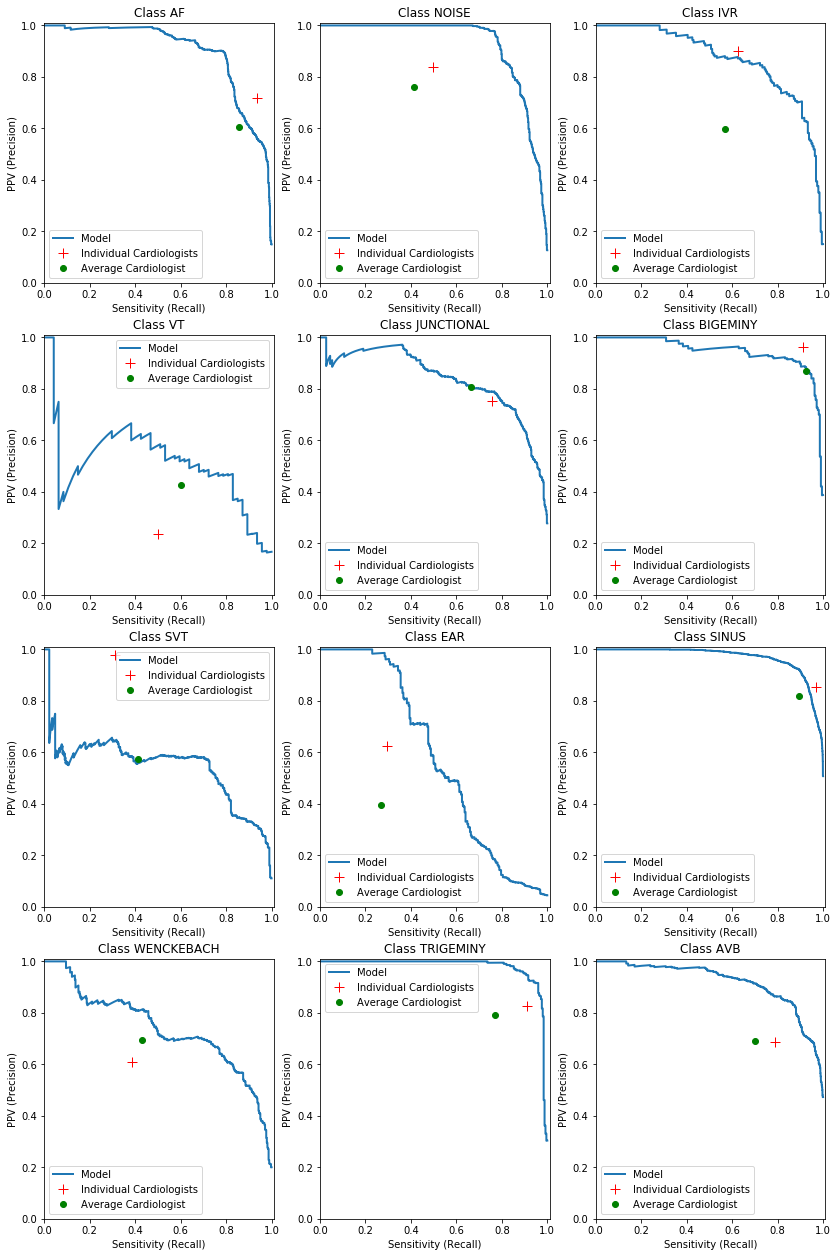

In [3]:
human_res = {'WENCKEBACH': ([0.61, 0.766, 0.614, 0.433, 0.96, 0.748, 0.695], [0.385, 0.439, 0.561, 0.155, 0.519, 0.524, 0.43]), 'NOISE': ([0.839, 0.5, 0.875, 0.729, 0.768, 0.766, 0.76], [0.497, 0.153, 0.407, 0.64, 0.402, 0.381, 0.414]), 'AF': ([0.719, 0.564, 0.618, 0.597, 0.601, 0.544, 0.604], [0.938, 0.881, 0.859, 0.781, 0.8, 0.875, 0.856]), 'JUNCTIONAL': ([0.754, 0.914, 0.907, 0.766, 0.802, 0.72, 0.809], [0.759, 0.681, 0.83, 0.511, 0.574, 0.638, 0.665]), 'TRIGEMINY': ([0.825, 0.879, 0.712, 0.688, 0.949, 0.735, 0.793], [0.912, 0.895, 0.912, 0.386, 0.649, 0.877, 0.772]), 'SINUS': ([0.853, 0.791, 0.868, 0.785, 0.761, 0.869, 0.818], [0.969, 0.822, 0.867, 0.907, 0.945, 0.857, 0.894]), 'VT': ([0.235, 0.5, 0.364, 0.375, 0.833, 0.5, 0.426], [0.5, 0.625, 0.5, 0.375, 0.625, 1.0, 0.604]), 'IVR': ([0.902, 0.386, 0.609, 0.925, 0.727, 0.448, 0.599], [0.627, 0.661, 0.661, 0.627, 0.407, 0.441, 0.571]), 'BIGEMINY': ([0.962, 0.824, 0.918, 0.75, 0.917, 0.889, 0.871], [0.911, 1.0, 1.0, 0.857, 0.786, 1.0, 0.926]), 'EAR': ([0.625, 0.377, 0.274, 0.0, 0.303, 0.61, 0.394], [0.294, 0.338, 0.294, 0.0, 0.147, 0.529, 0.267]), 'SVT': ([0.978, 0.536, 0.805, 0.248, 0.583, 0.565, 0.573], [0.312, 0.319, 0.759, 0.248, 0.348, 0.496, 0.414]), 'AVB': ([0.685, 0.736, 0.654, 0.55, 0.787, 0.719, 0.689], [0.787, 0.83, 0.596, 0.557, 0.74, 0.685, 0.699])}
f, ax = plt.subplots(4,3,figsize=(14, 22)) #(14,4))
for e, c in enumerate(human_res.keys()):#["AF", "TRIGEMINY", "AVB"]):
    class_name = c
    class_idx = processor.class_to_int[class_name]
    binary_gt = gt.copy().squeeze(axis=0)
    class_mask = binary_gt == class_idx
    binary_gt[class_mask] = 1
    binary_gt[~class_mask] = 0
    binary_probs = probs[:, :, class_idx]
    ppvs, senss, _ = precision_recall_curve(binary_gt.ravel(), binary_probs.ravel())
    h_ppv, h_sens = human_res[class_name]
    h_ppv, h_sens = np.array(h_ppv), np.array(h_sens)
    h_ppv, avg_ppv = h_ppv[:-1], h_ppv[-1:]
    h_sens, avg_sens = h_sens[:-1], h_sens[-1:]
    
    i = e % 4
    j = e / 4
    cax = ax[i][j]
    #cax = ax[e]
    cax.plot(senss, ppvs, lw=2, label="Model")
    cax.plot(h_sens[0], h_ppv[0], 'r+', markersize=10, label="Individual Cardiologists")
    cax.plot(avg_sens, avg_ppv, 'go', markersize=6, label="Average Cardiologist")
    cax.set_xlim(0.0, 1.01)
    cax.set_ylim(0.0, 1.01)
    cax.set_title("Class {}".format(c))
    cax.set_xlabel('Sensitivity (Recall)')
    cax.set_ylabel('PPV (Precision)')
    cax.legend(loc=0)

plt.savefig("human_model_prec_recall_curve_all.pdf",
   dpi=400,
   format='pdf',
   bbox_inches='tight')